In [ ]:
! pip install stable-baselines3[extra]
! pip install yfinance

In [4]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
# import talib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4412    0  4412    0     0  14693      0 --:--:-- --:--:-- --:--:-- 14805
100  517k  100  517k    0     0   352k      0  0:00:01  0:00:01 --:--:-- 1017k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4424    0  4424    0     0   7746      0 --:--:-- --:--:-- --:--:--  7747
100  392k  100  392k    0     0   234k      0  0:00:01  0:00:01 --:--:--  645k


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [6]:
import gym
from gym import spaces

# Data loading

In [7]:
INIT_NET_WORTH = 10000
WINDOW = 10
ROLLING = int(252 / 2)

In [8]:
ROLLING

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


126

In [9]:
TICKER = 'SPY'

if TICKER == 'COSINE':
    df = pd.DataFrame({
        'High': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.01, size = (2000, )),
        'Open': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.01, size = (2000, )),
        'Close': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.01, size = (2000, )),
        'Low': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.01, size = (2000, )),
        'Volume': np.abs(np.sin(np.arange(2000)/100.0)),
      }
      )
else:
    df = yf.download(TICKER, start="2000-01-01", end="2011-01-01")

[*********************100%%**********************]  1 of 1 completed


In [10]:
train_features = pd.DataFrame(
            {
                'RSI': ((talib.RSI(df['Close'], timeperiod=ROLLING).to_frame().fillna(50.0) - 50) / 100).values.flatten(),
                'CMO': ((talib.CMO(df['Close'], timeperiod=ROLLING).to_frame().fillna(0.0)) / 100).values.flatten(),
                'MOM': df['Close'].pct_change(ROLLING).to_frame().fillna(0.0).values.flatten(),
                'MFI': ((talib.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=ROLLING) - 50) / 100).fillna(0.0).values.flatten()
            }, index = df.index
        )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


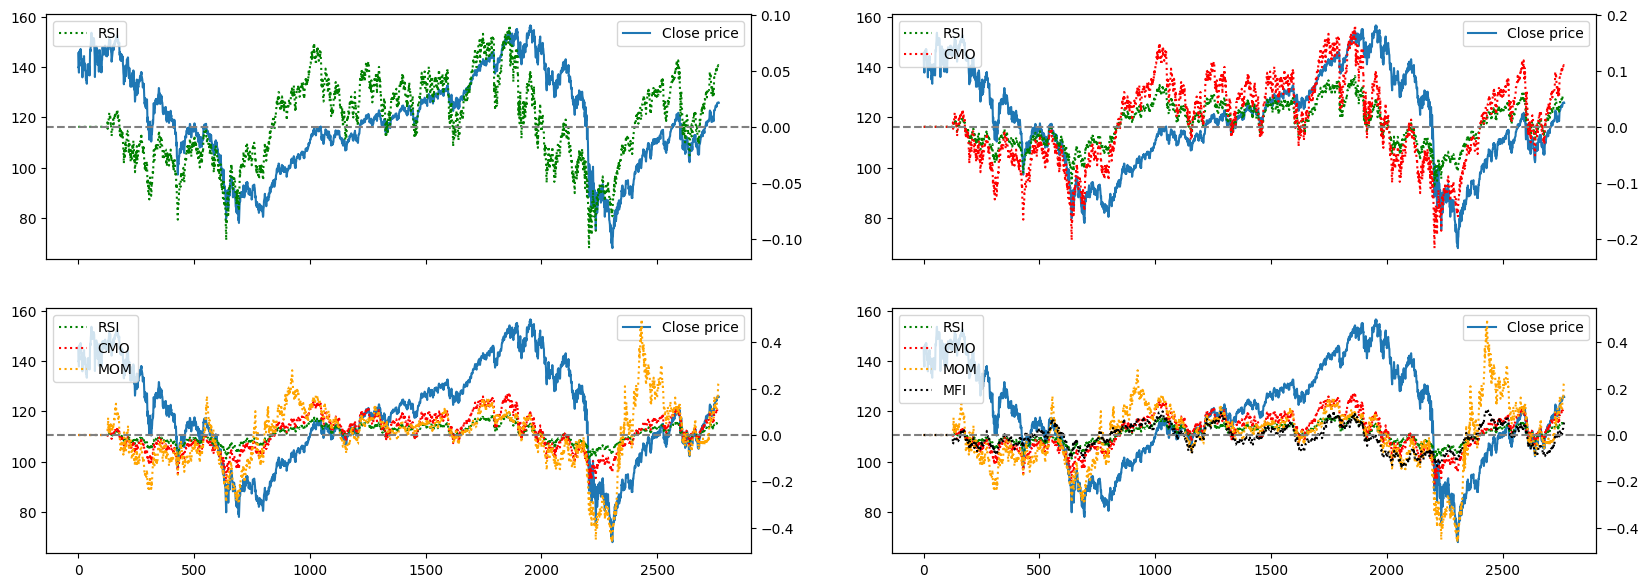

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 7), sharex=True)

ax1.plot(df['Close'].values, label = 'Close price')
ax1_copy = ax1.twinx()
ax1_copy.plot(train_features['RSI'].values, label = 'RSI', color = 'green', ls = 'dotted')
ax1_copy.axhline(0.0, ls = '--', color = 'grey')

ax2.plot(df['Close'].values, label = 'Close price')
ax2_copy = ax2.twinx()
ax2_copy.plot(train_features['RSI'].values, label = 'RSI', color = 'green', ls = 'dotted')
ax2_copy.plot(train_features['CMO'].values, label = 'CMO', color = 'red', ls = 'dotted')
ax2_copy.axhline(0.0, ls = '--', color = 'grey')

ax3.plot(df['Close'].values, label = 'Close price')
ax3_copy = ax3.twinx()
ax3_copy.plot(train_features['RSI'].values, label = 'RSI', color = 'green', ls = 'dotted')
ax3_copy.plot(train_features['CMO'].values, label = 'CMO', color = 'red', ls = 'dotted')
ax3_copy.plot(train_features['MOM'].values, label = 'MOM', color = 'orange', ls = 'dotted')
ax3_copy.axhline(0.0, ls = '--', color = 'grey')

ax4.plot(df['Close'].values, label = 'Close price')
ax4_copy = ax4.twinx()
ax4_copy.plot(train_features['RSI'].values, label = 'RSI', color = 'green', ls = 'dotted')
ax4_copy.plot(train_features['CMO'].values, label = 'CMO', color = 'red', ls = 'dotted')
ax4_copy.plot(train_features['MOM'].values, label = 'MOM', color = 'orange', ls = 'dotted')
ax4_copy.plot(train_features['MFI'].values, label = 'MFI', color = 'black', ls = 'dotted')
ax4_copy.axhline(0.0, ls = '--', color = 'grey')

ax1.legend(loc=0)
ax1_copy.legend(loc=2)
ax2.legend(loc=0)
ax2_copy.legend(loc=2)
ax3.legend(loc=0)
ax3_copy.legend(loc=2)
ax4.legend(loc=0)
ax4_copy.legend(loc=2)
plt.show()

# Environment

In [12]:
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.vec_env import DummyVecEnv

In [13]:
class StockTradingEnv(gym.Env):

    def __init__(self, df, init_account_balance, window_shape, random_start = False):
        # initialize environment
        super(StockTradingEnv, self).__init__()
        # raw dataset
        self.df = df
        # how much $ do we have?
        self.init_account_balance = init_account_balance
        self.balance = self.init_account_balance
        self.net_worth = self.init_account_balance

        # Actions of the format Buy x%, Sell x%, Hold, etc.
        self.window_shape = window_shape
        self.action_space = spaces.Discrete(2)
        self.random_start = random_start

        # current step, starts with window size or random
        if not self.random_start:
            self.current_step = self.window_shape
        else:
            self.current_step = random.randint(self.window_shape, len(self.df) - self.window_shape)

        # process data initially
        self.process_data()

        # share costs
        self.in_position = False
        self.position_value = 0.0
        self.price_bought = 0.0
        self.bet_bought = 0.0

    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = self.init_account_balance
        self.net_worth = self.init_account_balance
        if not self.random_start:
            self.current_step = self.window_shape
        else:
            self.current_step = random.randint(self.window_shape, len(self.df) - self.window_shape)
        self.in_position = False
        self.position_value = 0.0
        self.price_bought = 0.0
        self.bet_bought = 0.0
        return self.get_observation()

    def process_data(self):
        self.start, self.end = self.window_shape, len(self.df)
        self.prices = self.df.iloc[self.start:self.end]
        # self.signal_features = self.df[['Open', 'Close', 'High', 'Low']].pct_change().fillna(0.0).iloc[self.start:self.end]
        # self.signal_features = self.df[['Close']].pct_change().fillna(0.0).iloc[self.start:self.end]

        self.signal_features = pd.DataFrame(
            {
                'RSI': ((talib.RSI(self.df['Close'], timeperiod=ROLLING).to_frame().fillna(50.0) - 50) / 100).values.flatten(),
                'CMO': ((talib.CMO(self.df['Close'], timeperiod=ROLLING).to_frame().fillna(0.0)) / 100).values.flatten(),
                'MOM': self.df['Close'].pct_change(ROLLING).to_frame().fillna(0.0).values.flatten(),
                'MFI': ((talib.MFI(self.df['High'], self.df['Low'], self.df['Close'], self.df['Volume'], timeperiod=ROLLING) - 50) / 100).fillna(0.0).values.flatten()
            },
            index = self.df.index).iloc[self.start:self.end]

        # Prices contains the OHCL values for the last five prices
        self.observation_space = spaces.Box(
            low=-1, high=1, shape=(self.window_shape, self.signal_features.shape[-1]), dtype=np.float16
        )

    def get_observation(self):
        market_state = self.signal_features.iloc[self.current_step-self.window_shape:self.current_step]
        return market_state

    def step(self, action):
        self.take_action(action)
        self.current_step += 1

        if self.current_step > len(self.df) - self.window_shape:
            self.current_step = self.window_shape

        reward = self.net_worth

        done = False
        if (self.net_worth <= 0) or (self.current_step >= (len(self.df) - self.window_shape)):
            done = True

        obs = self.get_observation()
        return obs, reward, done, {}

    def take_action(self, action):

        # Set the current price to a random price within the time step
        current_price = random.uniform(
              self.df.iloc[self.current_step]["Open"],
              self.df.iloc[self.current_step]["Close"]
          )

        if not self.in_position:
            if action == 1: # OPEN LONG
                self.in_position = True
                self.price_bought = current_price
                self.bet_bought = self.balance
                self.balance -= self.bet_bought
                self.position_value = self.bet_bought
            else: # KEEP LOOKING
                pass
        else:
            market_return = ((current_price - self.price_bought) / self.price_bought)
            if action == 1: # HOLD LONG
                self.position_value = self.bet_bought * (1.0 + market_return)
            else: # CLOSE LONG
                self.balance += self.bet_bought * (1.0 + market_return)
                self.in_position = False
                self.price_bought = 0.0
                self.bet_bought = 0.0
                self.position_value = 0.0

        self.net_worth = self.balance + self.position_value

    def render(self, mode='human'):
        return {
            'step': self.current_step,
            'balance': self.balance,
            'position': self.position_value,
            'net_worth': self.net_worth,
            'profit': self.net_worth - self.init_account_balance
        }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
N_TIME_STEPS = len(df) - WINDOW
LR = 0.001
RANDOM_SEED = 11111

In [22]:
# The algorithms require a vectorized environment to run
env_train = StockTradingEnv(df, INIT_NET_WORTH, WINDOW)
# env_train_viz = DummyVecEnv([lambda: StockTradingEnv(df, INIT_NET_WORTH, WINDOW)])
model = A2C('MlpPolicy', env_train, verbose=1, learning_rate=LR, seed=RANDOM_SEED)
model.learn(total_timesteps=N_TIME_STEPS, log_interval=100)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


-------------------------------------
| time/                 |           |
|    fps                | 209       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.69     |
|    explained_variance | -1.78e-05 |
|    learning_rate      | 0.001     |
|    n_updates          | 99        |
|    policy_loss        | 1.59e+04  |
|    value_loss         | 6.93e+08  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 221      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.606   |
|    explained_variance | 5.9e-06  |
|    learning_rate      | 0.001    |
|    n_updates          | 199      |
|    policy_loss        | 1.81e+04 |
|    value_loss         

# In-sample evaluation

In [25]:
def evaluate_agent(env, df, model):
    obs = env.reset()
    history = {
        'balance': [],
        'action': [],
        'position': [],
        'net_worth': []
    }

    for i in range(len(df) - WINDOW):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        if done == True:
            break
        state = env.render()
        history['action'].append(action)
        history['balance'].append(state['balance'])
        history['net_worth'].append(state['net_worth'])
        history['position'].append(state['position'])

    actions_over_time = np.array(history['action'])
    return history, actions_over_time

In [26]:
history, actions_over_time = evaluate_agent(env_train, df, model)

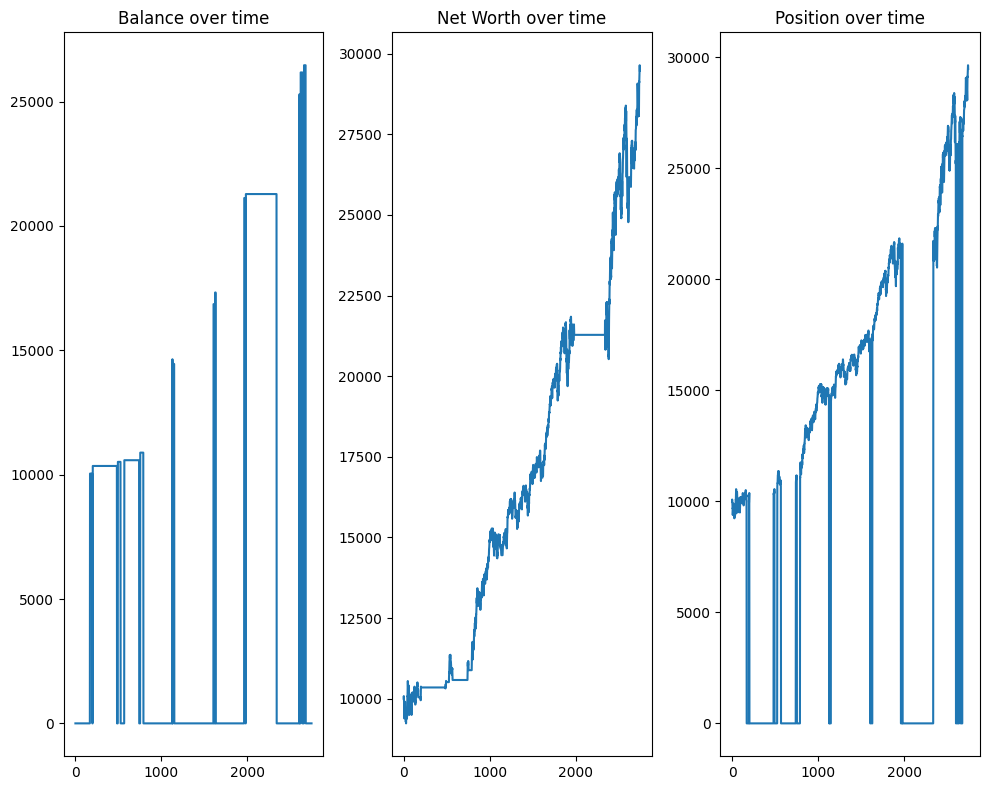

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
# Plotting balance
axs[0].plot(history['balance'])
axs[0].set_title('Balance over time')

# Plotting net worth
axs[1].plot(history['net_worth'])
axs[1].set_title('Net Worth over time')

# Plotting position
axs[2].plot(history['position'])
axs[2].set_title('Position over time')

# Customizing layout
fig.tight_layout()

# Display the plot
plt.show()

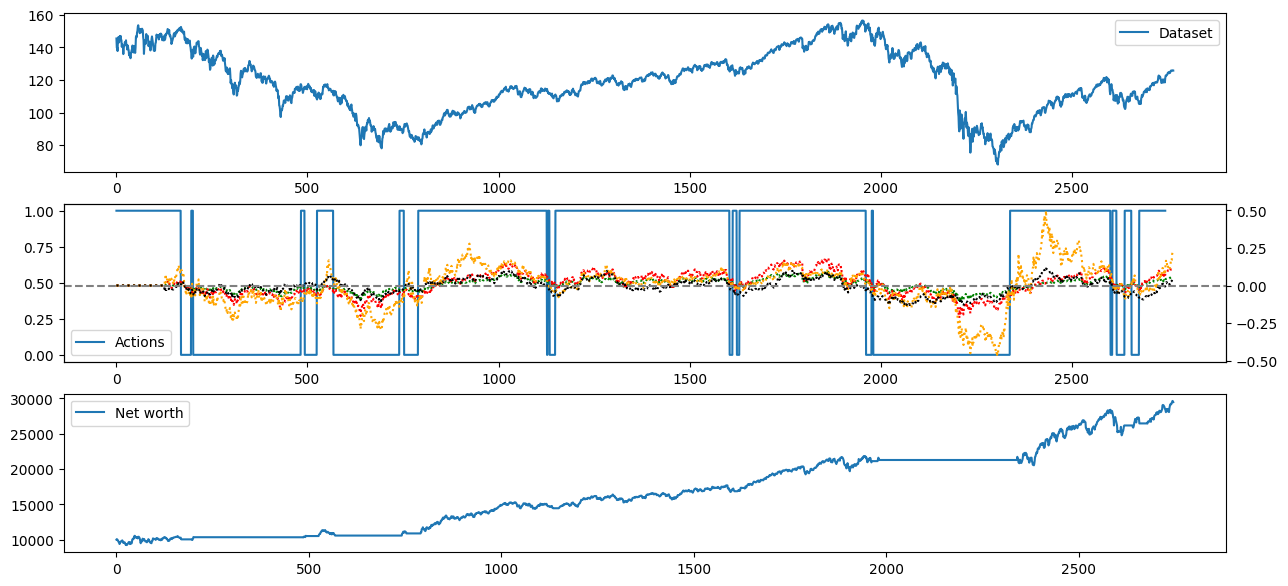

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 7))
ax1.plot(df['Close'].values, label = 'Dataset')

ax2.plot(actions_over_time.flatten(), label = 'Actions')
ax2_copy = ax2.twinx()
ax2_copy.plot(train_features['RSI'].values, label = 'RSI', color = 'green', ls = 'dotted')
ax2_copy.plot(train_features['CMO'].values, label = 'CMO', color = 'red', ls = 'dotted')
ax2_copy.plot(train_features['MOM'].values, label = 'MOM', color = 'orange', ls = 'dotted')
ax2_copy.plot(train_features['MFI'].values, label = 'MFI', color = 'black', ls = 'dotted')
ax2_copy.axhline(0.0, ls = '--', color = 'grey')

ax3.plot(np.array(history['net_worth']), label = 'Net worth')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Evaluation single holdout out-of-sample

In [33]:
if TICKER == 'COSINE':
    df_test = pd.DataFrame({
        'High': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.02, size = (2000, )),
        'Open': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.02, size = (2000, )),
        'Close': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.02, size = (2000, )),
        'Low': np.sin(np.arange(2000)/100.0) + np.random.normal(2, 0.02, size = (2000, )),
        'Volume': np.abs(np.sin(np.arange(2000)/100.0)),
      }
      )
else:
    df_test = yf.download(TICKER, start="2011-01-01", end="2021-07-01")

[*********************100%%**********************]  1 of 1 completed


In [34]:
test_features = pd.DataFrame(
            {
                'RSI': ((talib.RSI(df_test['Close'], timeperiod=ROLLING).to_frame().fillna(50.0) - 50) / 100).values.flatten(),
                'CMO': ((talib.CMO(df_test['Close'], timeperiod=ROLLING).to_frame().fillna(0.0)) / 100).values.flatten(),
                'MOM': df_test['Close'].pct_change(ROLLING).to_frame().fillna(0.0).values.flatten(),
                'MFI': ((talib.MFI(df_test['High'], df_test['Low'], df_test['Close'], df_test['Volume'], timeperiod=ROLLING) - 50) / 100).fillna(0.0).values.flatten()
            }, index = df_test.index
        )

In [35]:
env_test = StockTradingEnv(df_test, INIT_NET_WORTH, WINDOW)

In [36]:
history_test, actions_over_time_test = evaluate_agent(env_test, df_test, model)

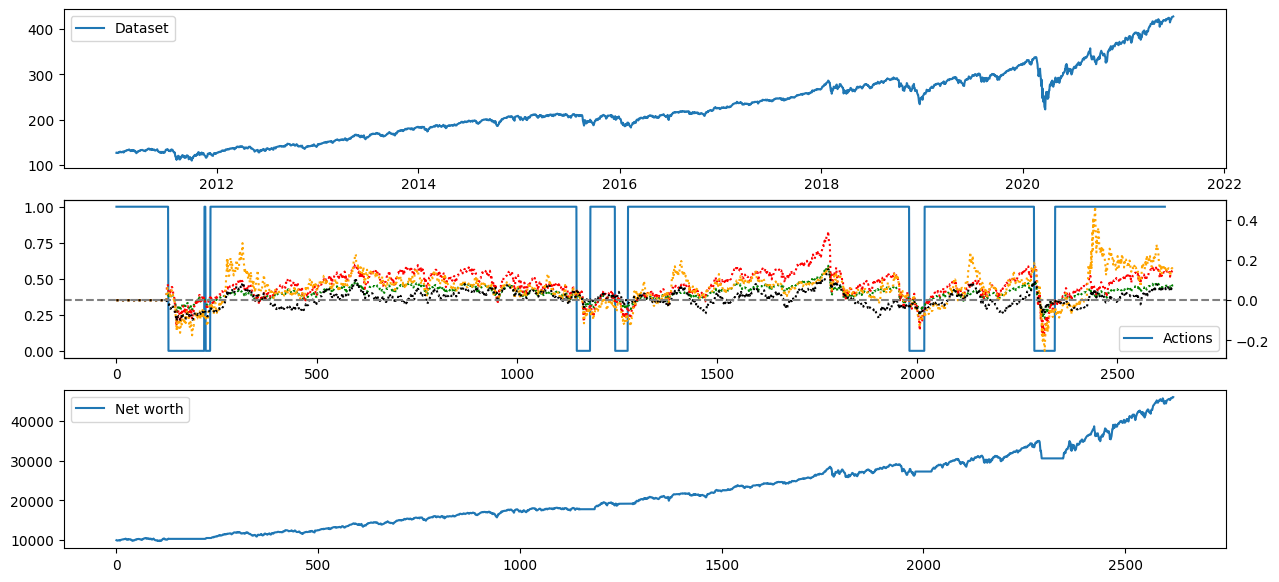

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 7))
ax1.plot(df_test['Close'], label = 'Dataset')
ax2.plot(actions_over_time_test.flatten(), label = 'Actions')
ax2_copy = ax2.twinx()
ax2_copy.plot(test_features['RSI'].values, label = 'RSI', color = 'green', ls = 'dotted')
ax2_copy.plot(test_features['CMO'].values, label = 'CMO', color = 'red', ls = 'dotted')
ax2_copy.plot(test_features['MOM'].values, label = 'MOM', color = 'orange', ls = 'dotted')
ax2_copy.plot(test_features['MFI'].values, label = 'MFI', color = 'black', ls = 'dotted')
ax2_copy.axhline(0.0, ls = '--', color = 'grey')
ax3.plot(np.array(history_test['net_worth']), label = 'Net worth')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Metrics and point evaluation
https://quantdare.com/probabilistic-sharpe-ratio/

In [38]:
from scipy import stats as scipy_stats

In [39]:
train_returns = pd.DataFrame(history['net_worth']).pct_change().fillna(0.0).values
test_returns = pd.DataFrame(history_test['net_worth']).pct_change().fillna(0.0).values
train_benchmark = df['Close'].pct_change().fillna(0.0).values
test_benchmark = df_test['Close'].pct_change().fillna(0.0).values

### Sharpe ratio variations

- Sharpe ratios (annualized, probabilistic, deflated): basic performance metrics that, however, have to be fixed for fat-tail and skewed distributions and multiple testing

In [41]:
def estimated_sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns)

def annualized_sharpe_ratio(returns, periods = 252):
    return np.mean(returns) / np.std(returns) * np.sqrt(periods)

def estimated_sharpe_ratio_stdev(returns):
    # https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1821643
    _returns = pd.DataFrame(returns)
    n = len(_returns)
    skew = pd.Series(scipy_stats.skew(_returns), index=_returns.columns)
    kurtosis = pd.Series(scipy_stats.kurtosis(_returns, fisher=False), index=_returns.columns)
    sr = estimated_sharpe_ratio(_returns)
    sr_std = np.sqrt((1 + (0.5 * sr ** 2) - (skew * sr) + (((kurtosis - 3) / 4) * sr ** 2)) / (n - 1))
    return sr_std

def probabilistic_sharpe_ratio(returns, sr_benchmark=0.0):
    sr = estimated_sharpe_ratio(returns)
    sr_std = estimated_sharpe_ratio_stdev(returns)
    psr = scipy_stats.norm.cdf((sr - sr_benchmark) / sr_std)
    return psr[0]

In [42]:
annualized_sharpe_ratio(train_benchmark), annualized_sharpe_ratio(test_benchmark)

(0.05017004802099098, 0.7639839428853132)

In [43]:
annualized_sharpe_ratio(train_returns), annualized_sharpe_ratio(test_returns)

(1.0382114006215815, 1.408838866642)

In [44]:
probabilistic_sharpe_ratio(train_returns, 0.0), probabilistic_sharpe_ratio(test_returns, 0.0)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0.9996869968354195, 0.9999952499549501)

### Beating the benchmark
Information ratio: this metric helps us to compare our strategy to the underlying or the benchmark beyond the “alpha”. It is the annualized ratio between the average excess return and the tracking error.


In [45]:
def information_ratio(returns, benchmark):
    diff = returns - benchmark
    return np.mean(diff) / np.std(diff)

In [46]:
information_ratio(train_returns, train_benchmark), information_ratio(test_returns, test_benchmark)

(0.02420243483743605, 0.006806432310684538)

In [47]:
probabilistic_sharpe_ratio(
    train_returns, estimated_sharpe_ratio(train_benchmark)
    ), probabilistic_sharpe_ratio(
    test_returns, estimated_sharpe_ratio(test_benchmark)
   )

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0.99943267528373, 0.9786637920946589)

# Probabilistic evaluation: combinatorial cross-validation

In [ ]:
from sklearn.model_selection import BaseCrossValidator
from itertools import combinations
import tqdm

In [ ]:
class CombinatorialCV(BaseCrossValidator):

    def __init__(self, X, N, k):
        self.X = X
        self.N = N
        self.k = k

    def generate_eras(self):
        # assuming exact division, we will cut-off small piece of time series
        # in the very beginning
        return np.array(sum([
                    [i] * (len(self.X) // self.N) for i in range(self.N)
                    ], []
                   )
        )

    def split(self, X=None, y=None, groups=None):
        # removing first m items from time series
        eras = self.generate_eras()
        len_diff = abs(len(self.X) - len(eras))
        comb = list(combinations(range(self.N), self.N-self.k))
        all_splits = range(self.N)

        for combination in comb:
            train_indices, test_indices = [], []
            for c in combination:
                indices_train = list(np.where(eras == c)[0])
                train_indices.extend(indices_train)
            for t in list(set(all_splits) - set(combination)):
                indices_test = list(np.where(eras == t)[0])
                test_indices.extend(indices_test)
            yield(train_indices, test_indices)

    def get_n_splits(self):
        comb = combinations(range(self.N), self.N-self.k)
        return len(list(comb))

In [ ]:
if TICKER == 'COSINE':
    full_df = pd.DataFrame({
        'High': np.sin(np.arange(5000)/100.0) + np.random.normal(2, 0.02, size = (5000, )),
        'Open': np.sin(np.arange(5000)/100.0) + np.random.normal(2, 0.02, size = (5000, )),
        'Close': np.sin(np.arange(5000)/100.0) + np.random.normal(2, 0.02, size = (5000, )),
        'Low': np.sin(np.arange(5000)/100.0) + np.random.normal(2, 0.02, size = (5000, )),
        'Volume': np.abs(np.sin(np.arange(5000)/100.0)),
      }
      )
else:
    full_df = yf.download(TICKER, start="2000-01-01", end="2021-07-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
N, k = 6, 3
cv = CombinatorialCV(full_df, N, k)
cv.get_n_splits()

20

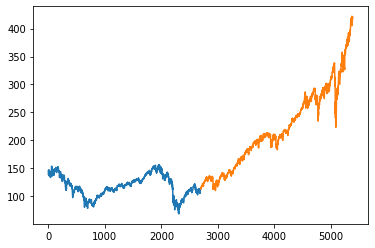

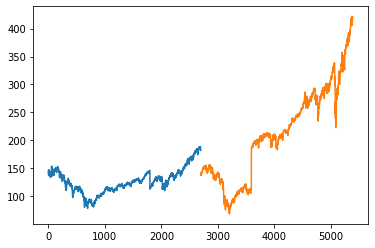

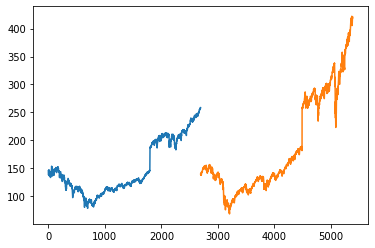

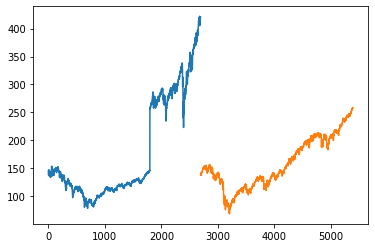

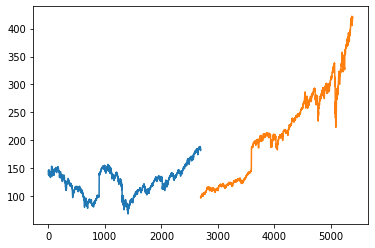

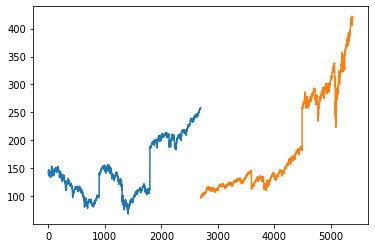

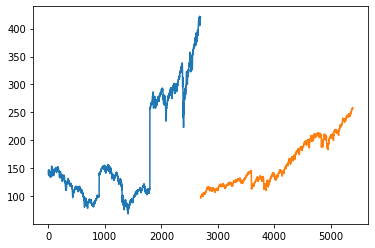

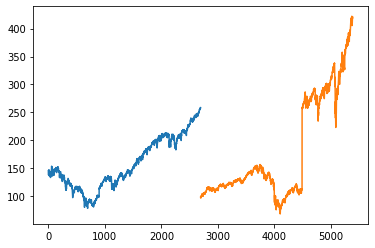

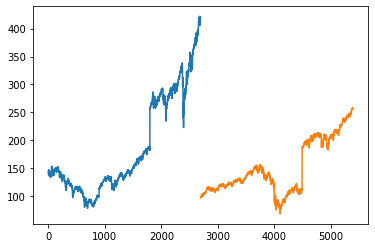

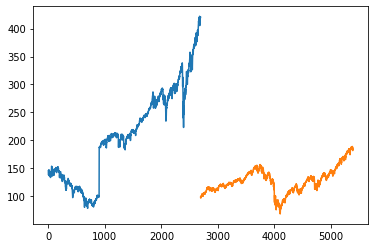

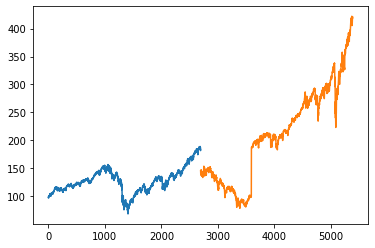

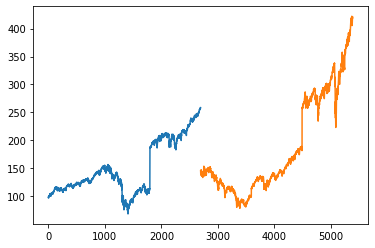

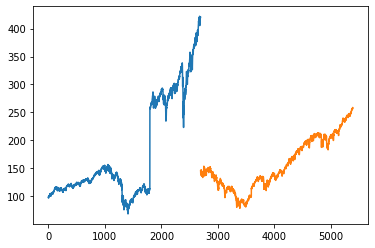

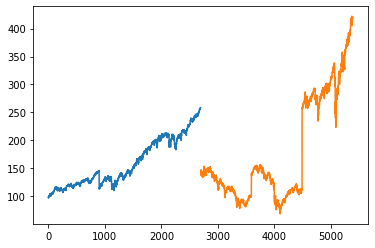

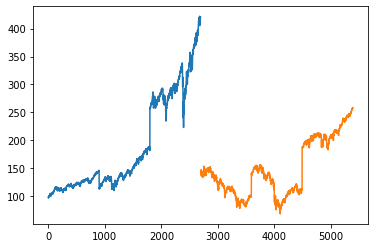

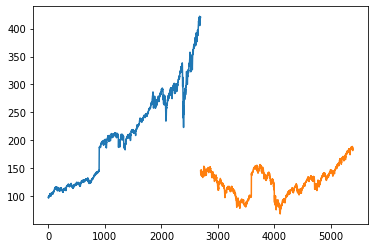

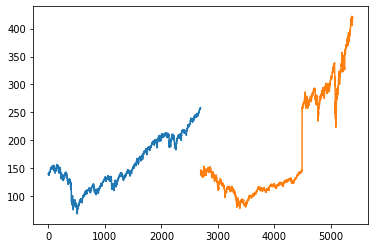

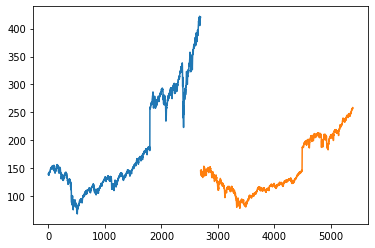

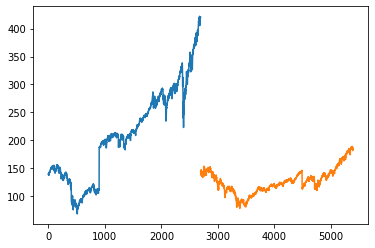

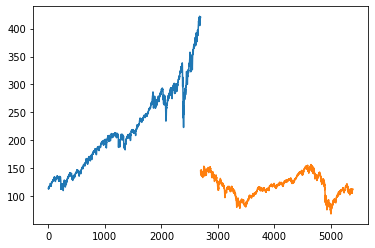

In [ ]:
for train_ids, test_ids in cv.split():
    X_train, X_test = full_df.iloc[train_ids], full_df.iloc[test_ids]
    plt.figure()
    plt.plot(range(len(X_train)), X_train['Close'])
    plt.plot(range(len(X_train), len(X_train)+len(X_test)), X_test['Close'])
    plt.show()

In [ ]:
train_results, test_results = {}, {}

for e, (train_ids, test_ids) in tqdm.tqdm(enumerate(cv.split())):

    X_train, X_test = full_df.iloc[train_ids], full_df.iloc[test_ids]
    env_train_cv = DummyVecEnv([lambda: StockTradingEnv(X_train, INIT_NET_WORTH, WINDOW)])
    env_train_cv_viz = DummyVecEnv([lambda: StockTradingEnv(X_train, INIT_NET_WORTH, WINDOW)])
    env_test_cv = DummyVecEnv([lambda: StockTradingEnv(X_test, INIT_NET_WORTH, WINDOW)])

    model_cv = A2C('MlpPolicy', env_train_cv, verbose=0, learning_rate=LR, seed=RANDOM_SEED)
    model_cv.learn(total_timesteps=N_TIME_STEPS)

    history_train_cv, actions_over_time_train_cv = evaluate_agent(env_train_cv_viz, X_train, model_cv)
    history_test_cv, actions_over_time_test_cv = evaluate_agent(env_test_cv, X_test, model_cv)

    train_results[e] = {
            'history': history_train_cv,
            'benchmark': X_train['Close'],
            'actions_over_time': actions_over_time_train_cv
    }

    test_results[e] = {
            'history': history_test_cv,
            'benchmark': X_test['Close'],
            'actions_over_time': actions_over_time_test_cv
    }


20it [04:58, 14.91s/it]


In [ ]:
def evaluate_cv(results, sr_bench=0.0):
    sharpes, prob_sharpes, info_ratios = [], [], []
    for v in results.values():
        nw = v['history']['net_worth']
        bmk = v['benchmark']
        returns = pd.DataFrame(nw).pct_change().fillna(0.0).values
        benchmark = bmk.pct_change().fillna(0.0).values
        ann_sharpe, prob_sharpe, ir = annualized_sharpe_ratio(returns), probabilistic_sharpe_ratio(returns, sr_bench), information_ratio(returns, benchmark)
        sharpes.append(ann_sharpe if not np.isnan(ann_sharpe) else 0.0)
        prob_sharpes.append(prob_sharpe if not np.isnan(prob_sharpe) else 0.0)
        info_ratios.append(ir if not np.isnan(ir) else 0.0)
    return sharpes, prob_sharpes, info_ratios

In [ ]:
sharpes_train, prob_sharpes_train, info_ratios_train = evaluate_cv(train_results)
sharpes_test, prob_sharpes_test, info_ratios_test = evaluate_cv(test_results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


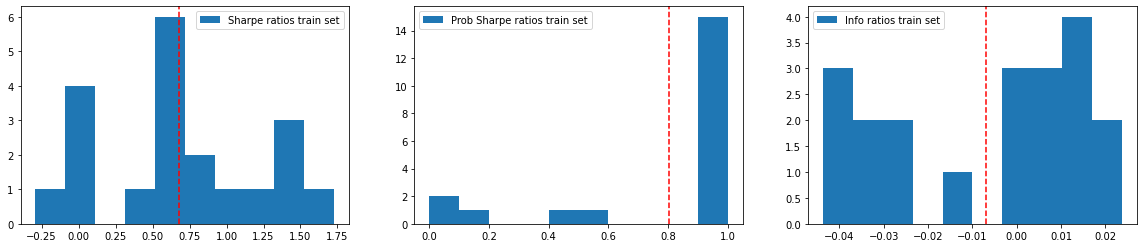

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 4))
ax1.hist(sharpes_train, label = 'Sharpe ratios train set')
ax1.axvline(np.mean(sharpes_train), ls = '--', color = 'red')
ax2.hist(prob_sharpes_train, label = 'Prob Sharpe ratios train set')
ax2.axvline(np.mean(prob_sharpes_train), ls = '--', color = 'red')
ax3.hist(info_ratios_train, label = 'Info ratios train set')
ax3.axvline(np.mean(info_ratios_train), ls = '--', color = 'red')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

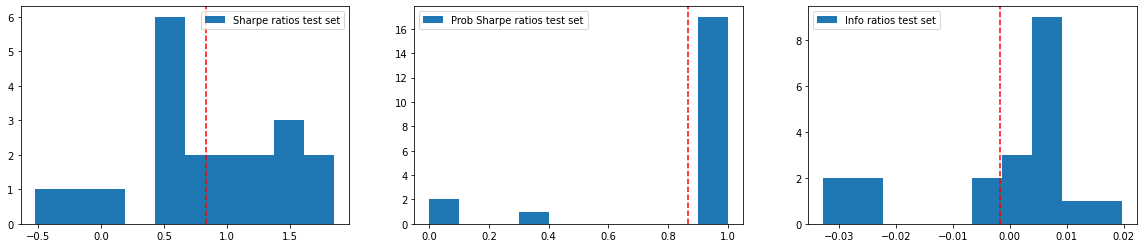

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 4))
ax1.hist(sharpes_test, label = 'Sharpe ratios test set')
ax1.axvline(np.mean(sharpes_test), ls = '--', color = 'red')
ax2.hist(prob_sharpes_test, label = 'Prob Sharpe ratios test set')
ax2.axvline(np.mean(prob_sharpes_test), ls = '--', color = 'red')
ax3.hist(info_ratios_test, label = 'Info ratios test set')
ax3.axvline(np.mean(info_ratios_test), ls = '--', color = 'red')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Backtest overfitting

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Y = sharpes_test
X = sharpes_train
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4.909
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0398
Time:                        06:33:36   Log-Likelihood:                -16.232
No. Observations:                  20   AIC:                             36.46
Df Residuals:                      18   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4872      0.202      2.408      0.0

In [ ]:
results.params

array([0.48716642, 0.50832994])

In [ ]:
x = np.arange(np.min(sharpes_train), np.max(sharpes_train), 0.1)
y = results.params[0] + results.params[1] * x

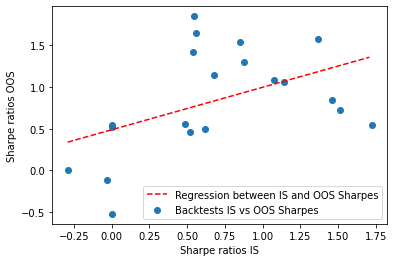

In [ ]:
plt.figure()
plt.scatter(sharpes_train, sharpes_test, label = 'Backtests IS vs OOS Sharpes')
plt.plot(x, y, color = 'red', ls = '--', label = 'Regression between IS and OOS Sharpes')
plt.xlabel('Sharpe ratios IS')
plt.ylabel('Sharpe ratios OOS')
plt.legend()
plt.show()

# Strategy Risk

In [ ]:
def binHR(sl, pt, n, tSR):
    a = (n + tSR**2) * (pt - sl)**2
    b = (2*n*sl - tSR**2*(pt-sl))*(pt-sl)
    c = n*sl**2
    p = (-b + (b**2 - 4*a*c)**0.5) / (2.*a)
    return p

def probFailure(ret, freq, tSR):
    # Derive probability that strategy may fail
    rPos, rNeg = ret[ret>0].mean(), ret[ret<=0].mean()
    p = ret[ret>0].shape[0] / float(ret.shape[0])
    thresP = binHR(rNeg, rPos, freq, tSR)
    risk = scipy_stats.norm.cdf(thresP, p, p*(1-p)) # approximation to bootstrap
    return risk

In [ ]:
test_returns_all = [
         pd.DataFrame(v['history']['net_worth']).pct_change().fillna(0.0).values for v in test_results.values()
              ]

In [ ]:
failure_probs = []
for test_return in test_returns_all:
    pf = probFailure(test_return, 252, 0.0)
    failure_probs.append(pf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


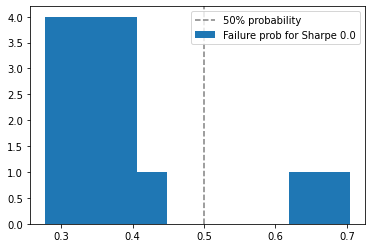

In [ ]:
plt.figure()
plt.hist(failure_probs, label = 'Failure prob for Sharpe 0.0')
plt.axvline(0.5, ls = '--', color = 'grey', label = '50% probability')
plt.legend()
plt.show()

# Multiple testing

In [ ]:
test_nws = []
for n in tqdm.tqdm(range(20)):
    env_train = DummyVecEnv([lambda: StockTradingEnv(df, INIT_NET_WORTH, WINDOW)])
    env_test = DummyVecEnv([lambda: StockTradingEnv(df_test, INIT_NET_WORTH, WINDOW)])
    model_i = A2C('MlpPolicy', env_train, verbose=1, learning_rate=LR)
    model_i.learn(total_timesteps=N_TIME_STEPS)
    history_test, actions_over_time_test = evaluate_agent(env_test, df_test, model_i)
    test_nws.append(history_test['net_worth'])

  0%|          | 0/20 [00:00<?, ?it/s]

Using cuda device


  5%|▌         | 1/20 [00:11<03:39, 11.54s/it]

Using cuda device


 10%|█         | 2/20 [00:22<03:26, 11.45s/it]

Using cuda device


 15%|█▌        | 3/20 [00:34<03:14, 11.43s/it]

Using cuda device


 20%|██        | 4/20 [00:45<03:01, 11.37s/it]

Using cuda device


 25%|██▌       | 5/20 [00:56<02:50, 11.36s/it]

Using cuda device


 30%|███       | 6/20 [01:07<02:38, 11.33s/it]

Using cuda device


 35%|███▌      | 7/20 [01:19<02:27, 11.32s/it]

Using cuda device


 40%|████      | 8/20 [01:30<02:15, 11.27s/it]

Using cuda device


 45%|████▌     | 9/20 [01:41<02:04, 11.30s/it]

Using cuda device


 50%|█████     | 10/20 [01:53<01:53, 11.32s/it]

Using cuda device


 55%|█████▌    | 11/20 [02:04<01:42, 11.43s/it]

Using cuda device


 60%|██████    | 12/20 [02:16<01:31, 11.48s/it]

Using cuda device


 65%|██████▌   | 13/20 [02:27<01:19, 11.40s/it]

Using cuda device


 70%|███████   | 14/20 [02:39<01:08, 11.41s/it]

Using cuda device


 75%|███████▌  | 15/20 [02:50<00:56, 11.38s/it]

Using cuda device


 80%|████████  | 16/20 [03:01<00:45, 11.39s/it]

Using cuda device


 85%|████████▌ | 17/20 [03:13<00:34, 11.35s/it]

Using cuda device


 90%|█████████ | 18/20 [03:24<00:22, 11.39s/it]

Using cuda device


 95%|█████████▌| 19/20 [03:35<00:11, 11.37s/it]

Using cuda device


100%|██████████| 20/20 [03:47<00:00, 11.36s/it]


In [ ]:
test_returns = pd.DataFrame(test_nws).T.pct_change().fillna(0.0)
te_sharpes = test_returns.mean() / test_returns.std()

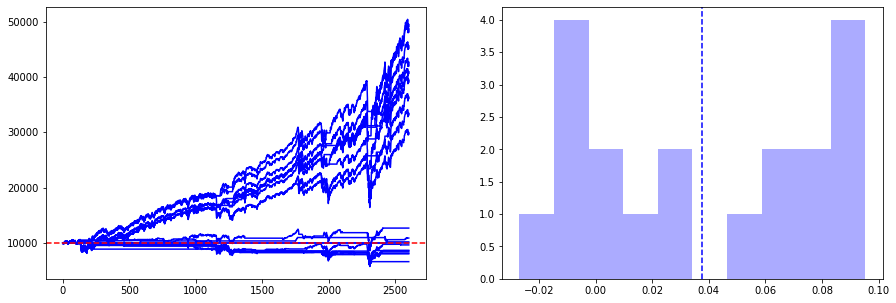

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for nwtest in test_nws:
    ax1.plot(nwtest, color = 'blue')
ax1.axhline(INIT_NET_WORTH, ls = '--', color = 'red')
ax2.hist(te_sharpes, color = 'blue', alpha = 0.33)
ax2.axvline(te_sharpes.mean(), ls = '--', color = 'blue')
plt.show()

In [ ]:
def num_independent_trials(trials_returns):
    m = trials_returns.shape[1]
    corr_matrix = trials_returns.corr().fillna(0.0)
    p = corr_matrix.values[np.triu_indices_from(corr_matrix.values,1)].mean()
    n = p + (1 - p) * m
    n = int(n)  # round up
    return n

def expected_maximum_sr(trials_returns, expected_mean_sr=0.0):
    emc = 0.5772156649 # Euler-Mascheroni constant
    independent_trials = num_independent_trials(trials_returns)
    srs = estimated_sharpe_ratio(trials_returns)
    trials_sr_std = srs.std()
    maxZ = (1 - emc) * scipy_stats.norm.ppf(1 - 1./independent_trials) + emc * scipy_stats.norm.ppf(1 - 1./(independent_trials * np.e))
    expected_max_sr = expected_mean_sr + (trials_sr_std * maxZ)
    return expected_max_sr

def deflated_sharpe_ratio(trials_returns, returns_selected, expected_mean_sr=0.0):
    expected_max_sr = expected_maximum_sr(trials_returns, expected_mean_sr)
    dsr = probabilistic_sharpe_ratio(returns=returns_selected, sr_benchmark=expected_max_sr)
    return dsr

In [ ]:
best_test_index = (test_returns.mean(axis=0) / test_returns.std(axis=0)).fillna(0.0).sort_values()[::-1].index[0]
best_test = test_returns[best_test_index]

In [ ]:
deflated_sharpe_ratio(test_returns, best_test)

0.8924983532251107

# Multiple testing #2

In [ ]:
test_nws2 = []
for n in tqdm.tqdm(range(20)):
    env_train = DummyVecEnv([lambda: StockTradingEnv(df, INIT_NET_WORTH, WINDOW)])
    env_test = DummyVecEnv([lambda: StockTradingEnv(df_test, INIT_NET_WORTH, WINDOW)])
    model_i = PPO('MlpPolicy', env_train, verbose=1, learning_rate=LR)
    model_i.learn(total_timesteps=N_TIME_STEPS)
    history_test, actions_over_time_test = evaluate_agent(env_test, df_test, model_i)
    test_nws2.append(history_test['net_worth'])

  0%|          | 0/20 [00:00<?, ?it/s]

Using cuda device


  5%|▌         | 1/20 [00:14<04:27, 14.08s/it]

Using cuda device


 10%|█         | 2/20 [00:27<04:12, 14.01s/it]

Using cuda device


 15%|█▌        | 3/20 [00:41<03:56, 13.90s/it]

Using cuda device


 20%|██        | 4/20 [00:55<03:41, 13.83s/it]

Using cuda device


 25%|██▌       | 5/20 [01:08<03:26, 13.79s/it]

Using cuda device


 30%|███       | 6/20 [01:22<03:13, 13.79s/it]

Using cuda device


 35%|███▌      | 7/20 [01:36<02:59, 13.79s/it]

Using cuda device


 40%|████      | 8/20 [01:50<02:45, 13.77s/it]

Using cuda device


 45%|████▌     | 9/20 [02:03<02:31, 13.75s/it]

Using cuda device


 50%|█████     | 10/20 [02:17<02:17, 13.79s/it]

Using cuda device


 55%|█████▌    | 11/20 [02:31<02:04, 13.82s/it]

Using cuda device


 60%|██████    | 12/20 [02:45<01:50, 13.81s/it]

Using cuda device


 65%|██████▌   | 13/20 [02:59<01:36, 13.76s/it]

Using cuda device


 70%|███████   | 14/20 [03:12<01:22, 13.70s/it]

Using cuda device


 75%|███████▌  | 15/20 [03:26<01:08, 13.70s/it]

Using cuda device


 80%|████████  | 16/20 [03:40<00:54, 13.72s/it]

Using cuda device


 85%|████████▌ | 17/20 [03:54<00:41, 13.77s/it]

Using cuda device


 90%|█████████ | 18/20 [04:08<00:27, 13.86s/it]

Using cuda device


 95%|█████████▌| 19/20 [04:22<00:13, 13.88s/it]

Using cuda device


100%|██████████| 20/20 [04:35<00:00, 13.79s/it]


In [ ]:
test_returns2 = pd.DataFrame(test_nws2).T.pct_change().fillna(0.0)
te_sharpes2 = test_returns2.mean() / test_returns2.std()

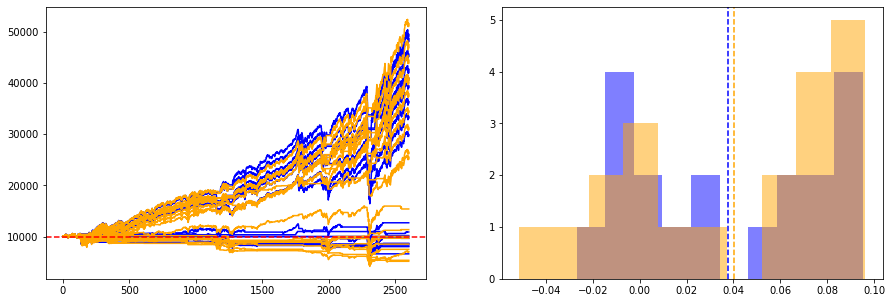

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for nwtest in test_nws:
    ax1.plot(nwtest, color = 'blue')
for nwtest in test_nws2:
    ax1.plot(nwtest, color = 'orange')
ax1.axhline(INIT_NET_WORTH, ls = '--', color = 'red')

ax2.hist(te_sharpes, color = 'blue', alpha = 0.5)
ax2.hist(te_sharpes2, color = 'orange', alpha = 0.5)
ax2.axvline(te_sharpes.mean(), ls = '--', color = 'blue')
ax2.axvline(te_sharpes2.mean(), ls = '--', color = 'orange')
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
def welch_test(data1, data2, alpha=0.05, tail=2):
    t, p = stats.ttest_ind(data1, data2, equal_var=False)
    if tail==1:
        alpha = 2*alpha
    if p <= alpha:
        if t<0:
            print("Result of the Welch's t-test at level %02g: μ2>μ1, the test passed with p-value = %02g." %(alpha, p))
        else:
            print("Result of the Welch's t-test level %02g: μ1>μ2, the test passed with p-value = %02g." %(alpha, p))
    else:
        print("Results of the Welch's t-test level %02g: there is not enough evidence to prove any order relation between μ1 and μ2." % alpha)
    print("Welch's t-test done.", t, p)

In [ ]:
welch_test(te_sharpes.dropna(), te_sharpes2.dropna())

Results of the Welch's t-test level 0.05: there is not enough evidence to prove any order relation between μ1 and μ2.
Welch's t-test done. -0.18984462986786962 0.8504736345426647
